# Figure2

## Figure2(A)

Principal component Analysis (PCA) of soil lipid profile \## Running
Code

## Load data

In [ ]:
library(readr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: carData


Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Rows: 13 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Type1, Type2
dbl (2): Sample, Weight for lipid extraction (g)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 4849 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): GlobalID, 19, 22, 36, 28, 44, 49, 35, 40, 52, 27, 43, 48

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Transpose normalized data

In [ ]:
normalized_data_t <- as.data.frame(t(normalized_data[-1]))
colnames(normalized_data_t) <- normalized_data$GlobalID
rownames(normalized_data_t) <- colnames(normalized_data)[-1]

# Merge data
metadata <- metadata %>% column_to_rownames(var = "Sample")
merged_data <- merge(metadata, normalized_data_t, by = "row.names")
rownames(merged_data) <- merged_data$Row.names
merged_data <- merged_data[-1]

# Extract dependent and independent variables
dependent_vars <- merged_data[, -(1:2)]
independent_vars <- merged_data[, 1:2]

# Perform PCA
pca_result <- PCA(dependent_vars, graph = FALSE)

# Print eigenvalues and variance explained
print(pca_result$eig)

        eigenvalue percentage of variance cumulative percentage of variance
comp 1    991.4307              20.441870                          20.44187
comp 2    623.6969              12.859729                          33.30160
comp 3    529.4601              10.916704                          44.21830
comp 4    443.3375               9.140980                          53.35928
comp 5    369.2024               7.612421                          60.97170
comp 6    347.0815               7.156320                          68.12802
comp 7    338.7679               6.984905                          75.11293
comp 8    320.7528               6.613460                          81.72639
comp 9    311.6173               6.425098                          88.15149
comp 10   290.2132               5.983778                          94.13527
comp 11   284.4396               5.864735                         100.00000

[1] 12  5

[1] "Number of available components: 5"

        Dim.1      Dim.2      Dim.3      Dim.4      Dim.5   Type1      Type2
19 -23.980304 -29.029869 -20.132917  24.563363   6.405672 Ambient No_drought
22  -8.165230 -22.104006  -5.455706  13.343251  21.339074 Ambient No_drought
27  -5.022556  21.051879   8.331302 -41.655712 -18.292173  Future    Drought
28  -1.150661   6.918219   8.487704 -21.033351  38.358708 Ambient    Drought
35  25.153383 -25.229976  11.176791   4.176309 -10.552689  Future No_drought
36  44.608999 -21.152511   8.590015 -12.318837 -26.335843 Ambient No_drought

## PCA plot

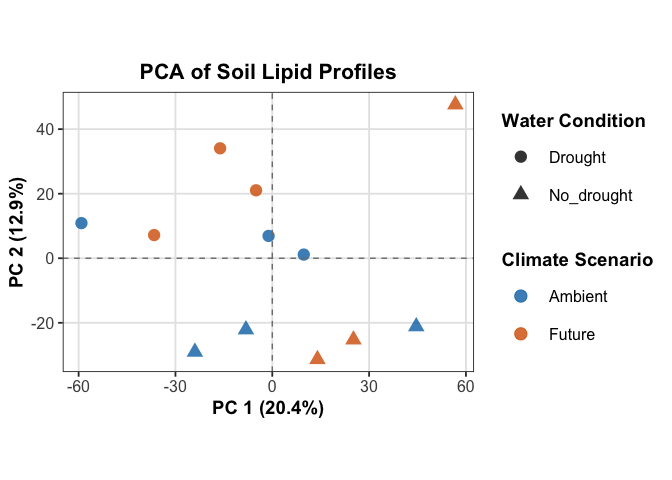

In [ ]:
library(ggplot2)
library(ggrepel)

var_explained <- pca_result$eig[, "percentage of variance"]
pc1_var <- round(var_explained[1], 1)
pc2_var <- round(var_explained[2], 1)

pca_plot <- ggplot(pca_data, aes(x = Dim.1, y = Dim.2, color = Type1, shape = Type2)) +
  geom_point(size = 4, alpha = 0.8) +
  scale_color_manual(values = c("Ambient" = "#0072B2", "Future" = "#D55E00"),
                     name = "Climate Scenario") +
  scale_shape_manual(values = c("Drought" = 16, "No_drought" = 17),
                     name = "Water Condition") +
  theme_bw(base_size = 14) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "gray90"),
    legend.position = "right",
    legend.box = "vertical",
    legend.key.size = unit(1, "cm"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title = element_text(face = "bold", size = 14),
    axis.text = element_text(size = 12)
  ) +
  labs(
    title = "PCA of Soil Lipid Profiles",
    x = paste0("PC 1 (", pc1_var, "%)"),
    y = paste0("PC 2 (", pc2_var, "%)")
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray50") +
  coord_fixed(ratio = 1)
print(pca_plot)

## Figure 2(B) Function to create interaction plot


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'scales'

The following object is masked from 'package:readr':

    col_factor

ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.

ℹ Please use `linewidth` instead.

ℹ Please use the `linewidth` argument instead.

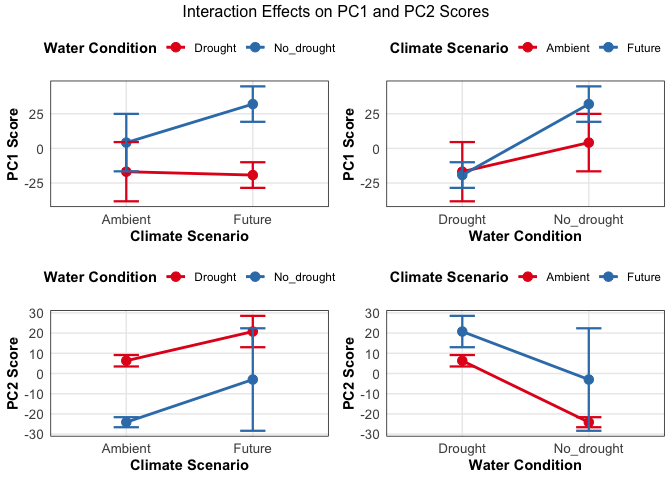

In [ ]:
library(ggplot2)
library(gridExtra)